# Telco Churn Project - Working Notebook
Project & Report Crated By: Rachel Robbins-Mayhill 2022-03-14

## PROJECT DESCRIPTION

With an ever-competitive business market, it is vital to understand your customer base and what drives them to stay with your company. Afterall, customer attrition is expensive! In fact, Telco has lost 140K of monthly revenue due to churn. Wouldn't it be nice to recover some of that revenue!

In the grand scheme of business, it is far less expensive to keep an existing customer than it is to acquire a new one for the long term. Therefore, it is important to identify drivers causing customers to leave. When you know WHY customers are leaving, you can take steps to help keep customers satisfied, ultimately preventing attrition and retaining current customers for the long term. Customer retention is not only important for maintaining revenue, but it allows room to continue to plan for growth while knowing you have a steady financial foundation. 

This report will identify key drivers of churn for the Telco dataset and use modeling and statistics to identify ways to prevent churn in the future. Churn is another term for attrition and is represented by the percentage of customers who stop doing business with the company. Ultimately this report will provide a recommendation that could be used by Telco or other customer-based service companies to decrease churn and maximize retention.

### PROJECT GOAL

The goal of this report is to identify key drivers of churn for Teleco, a telecommunications company, and make recommendations to reduce churn in order to increase customer retention, and ultimately increase revenue. Through machine learning and statistical analysis, predictions of future churn will be identified and recommendations for prevention will be made in order to improve customer retention.

### INITIAL QUESTIONS
During the course of exploration, this project worked to answer the following questions:
- Are customers with fiber optic internet more likely to churn?
- Are customers who pay more per month more likely to churn?
- Are month-to-month customers more likely to churn?
- What is the total monthly revenue for the company after churn?
- What amount of revenue is being lost by churn?
- What amount of revenue could we recover by implementing changes?

----

To look at the data, some supporting programs are needed. The required supplemental libraries and modules are imported below.

In [1]:
# import python linraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# import modules and created functions
import acquire
import prepare


# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

# import machine-learning python library elements 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# eliminate pesky warnings about future changes to libraries from popping up
import warnings
warnings.filterwarnings('ignore')

---

## ACQUISITION & PREPARATION of DATA

#### I. Acquire the Data

The data for this report was acquired by accessing 'telco_churn' from the Codeup SQL database. By combining all columns from four tables within the database;`customers`, `contract_types`, `internet_service_types`, and `payment_types.`

In [2]:
acquire_df = acquire.get_telco_data()

Reading from csv file...


In [ ]:
# build a viz here setting the context of the data 

In [ ]:
print(acquire_df.churn.value_counts())
acquire_df.churn.value_counts().plot.bar()
plt.title('Overall Churn')
plt.xlabel('Churn')
plt.ylabel('# Of Customers')
plt.tight_layout()
plt.show()

#### II. Prepare the Data

Once acquired, a new table (Dataframe) containing all necessary data was created.  This new table was then analyzed and adjusted to eliminate data errors, clarify confusion, and code non-numeric data into more useful numeric types. 

Some of the data correction strategies that were employed were:
    
- Addressing Missing Data
    - Dropping 11 missing values from total charges, as it was a very small portion of our data
    
- Dropping Unnecessary Columns
    - 'payment_type_id', 'internet_service_type_id', 'contract_type_id' had duplicate data, providing the same information as payment_type, internet_service_type, and contract_type 
    
- Rename Columns
    - Adding verbs 'is' or 'has' to column names for ease of data understanding after converting word values to numeric values
    
- Standardize Data Types
    - Adjusted monetary columns to have matching data types for ease of use
    
- Create Numeric Data Types for Data that was in Word From
    - The following columns needed to be transformed to numeric values: 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security','online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type'


#### Results of Preparing the Data
The results of the acquisition and preparation phases resulted in data that was ready to explore. 

In [3]:
df = prepare.clean_telco_data(acquire_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   customer_id                                7032 non-null   object 
 1   is_senior                                  7032 non-null   int64  
 2   tenure_months                              7032 non-null   int64  
 3   monthly_charges                            7032 non-null   float64
 4   total_charges                              7032 non-null   float64
 5   contract_type                              7032 non-null   object 
 6   internet_service_type                      7032 non-null   object 
 7   payment_type                               7032 non-null   object 
 8   is_male_Male                               7032 non-null   uint8  
 9   has_partner_Yes                            7032 non-null   uint8  
 10  has_dependents_Yes      

#### Segmenting Prepared Data

After cleaningup the data, it is split into 3 samples;  train, validate, and test. 
- The train sample is used to explore, fit to models, and evaluate results without looking at new data.
- The validate sample is used to verify our models built are not overfit to the train dataset.
- The test set sample is used to give an estimate of how this model will perform on data it has never seen in the future.
- The samples are then separated into two groups with y representing the target variable and x representing the rest of the data.

In [4]:
# The number of rows and columns for each split is shown below.
train, validate, test = prepare.data_split(df)

train -> (3937, 34)
validate -> (1688, 34)
test -> (1407, 34)


In [5]:
# Set our X and y, in order to conduct evaluation and testing on our target variable. 
X_train, y_train = train.drop(columns='did_churn_Yes'), train['did_churn_Yes']
X_validate, y_validate = validate.drop(columns='did_churn_Yes'), validate['did_churn_Yes']

In [26]:
X_train.head().T

,5919,1915,5054,2355,6279
is_senior,0.0,0.00,0.00,0.0,1.0
tenure_months,58.0,71.00,35.00,1.0,20.0
monthly_charges,71.1,85.45,25.75,19.2,54.0
total_charges,4299.2,6028.95,882.55,19.2,1055.9
is_male_Male,0.0,1.00,0.00,1.0,1.0
has_partner_Yes,0.0,0.00,1.00,1.0,0.0
has_dependents_Yes,0.0,1.00,1.00,1.0,0.0
has_phone_service_Yes,1.0,1.00,1.00,1.0,1.0
has_multiple_lines_No phone service,0.0,0.00,0.00,0.0,0.0
has_multiple_lines_Yes,1.0,1.00,1.00,0.0,0.0


________

## DATA EXPLORATION - Data in Context

- Exploration started by looking at all data features and how they may have related to customer churn. 
- Looking at a correlation matrix of the features in connection with churn (below), we see a higher correlation with: 
    - Fiber Optic Internet - Positive Correlation 
    - Electronic Check - Postive Correlation
    - Monthly Charges - Positive Correlation
    - Tenure Months - Negative Correlation


#### Correlations

In [28]:
df_corr = train.corr().reset_index()
corr_matrix = train.corr()
print(corr_matrix["did_churn_Yes"].sort_values(ascending=False))

did_churn_Yes                                1.000000
internet_service_type_Fiber optic            0.321678
payment_type_Electronic check                0.292306
monthly_charges                              0.196871
has_paperless_billing_Yes                    0.190075
is_senior                                    0.159932
has_multiple_lines_Yes                       0.053031
has_streaming_movies_Yes                     0.051348
has_streaming_tv_Yes                         0.038849
has_phone_service_Yes                        0.015906
is_male_Male                                 0.000008
has_multiple_lines_No phone service         -0.015906
has_device_protection_Yes                   -0.060108
has_online_backup_Yes                       -0.068519
payment_type_Mailed check                   -0.090324
payment_type_Credit card (automatic)        -0.127314
has_partner_Yes                             -0.143203
has_tech_support_Yes                        -0.159305
has_dependents_Yes          

#### Exploratory Questions
The correlation observations guided our exploratory questions.
1. Are Customers With Fiber Optic Internet More Likely to Churn?
2. Are Customers Who Pay More per Month More likely to Churn?
3. Are Month-to-Month Customers More Likely to Churn?
4. What is the Total Monthly Revenue for the Company?
5. What is the Amount of Monthly Revenue Lost by Those Who Have Churned?

### 1.  POSSIBLE DRIVER OF CHURN: Are Customers with Fiber Optic Internet More Likely to Churn?

#### Hypothesis

- H 0 : Churn for customers with fiber optic intenet <= churn of all customers
- H 𝑎 : Churn for customers with fiber optic intenet > churn of all customers

#### Visualization

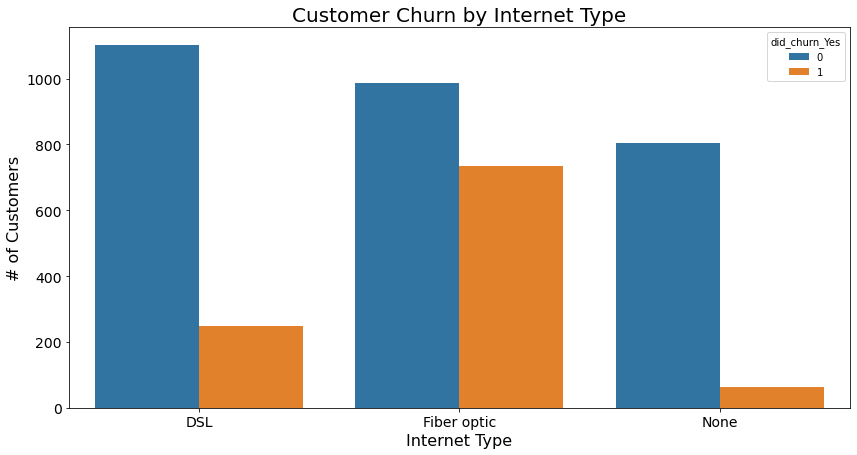

In [118]:
plt.figure(figsize=(14,7))
 
# count plot on two categorical variable
sns.countplot(x ='internet_service_type', hue = "did_churn_Yes", data = train)

plt.title('Customer Churn by Internet Type', fontsize = 20)
plt.xlabel('Internet Type', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('# of Customers', fontsize = 16)

# Show the plot
plt.show()

#### Statistical Testing

In [9]:
observed = pd.crosstab(train['internet_service_type_Fiber optic'], train. did_churn_Yes)
alpha= 0.05
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

chi^2 = 405.9211
p     = 0.0000
We reject the hypothesis


### Answer: Customers with fiber optic internet are more likely to churn. 

---------

### 2.  POSSIBLE DRIVER OF CHURN: Are Customers who Pay More in Monthly Charges More likely to churn?

#### Hypothesis

- H$_{0}$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers
- H$_{a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers

#### Visualize

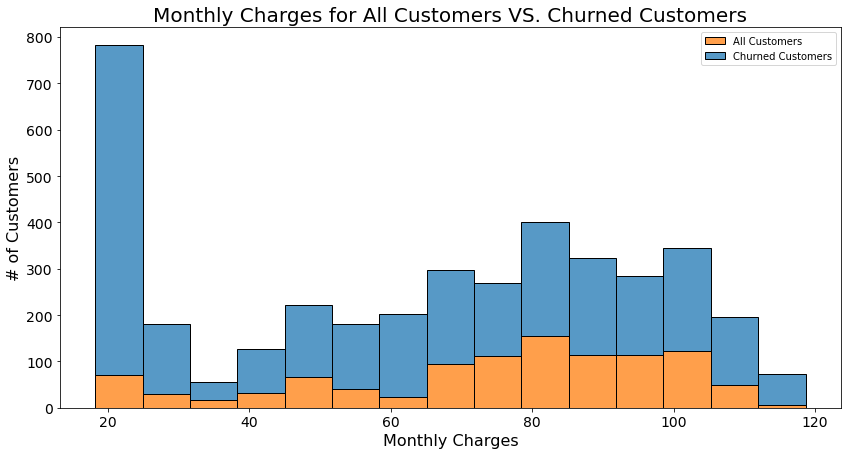

In [122]:
plt.figure(figsize=(14,7))
sns.histplot(train, x=train.monthly_charges, hue =  'did_churn_Yes', multiple = 'stack', legend = False)


plt.title('Monthly Charges for All Customers VS. Churned Customers', fontsize = 20)
plt.xlabel('Monthly Charges', fontsize = 16)
plt.ylabel('# of Customers', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['All Customers', 'Churned Customers'], loc= 'best')
plt.show()

#### Statistical Testing

In [11]:
# 1-Tailed, 1-Sample T-Test - Mean of Subgroup vs. Mean of Overall

alpha = 0.05
churn_sample = train[train.did_churn_Yes == 1].monthly_charges
overall_mean = train.monthly_charges.mean()
t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

13.037366230308015 2.0798982128378347e-36 0.05
We reject the null hypothesis.


### Answer: Customers who churn pay more in monthly charges.

-------

### 3.  POSSIBLE DRIVER OF CHURN: Are Month-to-Month Customers More Likely to Churn?

#### Hypothesis

- H 0 : Churn for customers with month to month contracts <= churn of all customers
- H 𝑎 : Churn for customers with month to month contracts > churn of all customers

#### Visualization

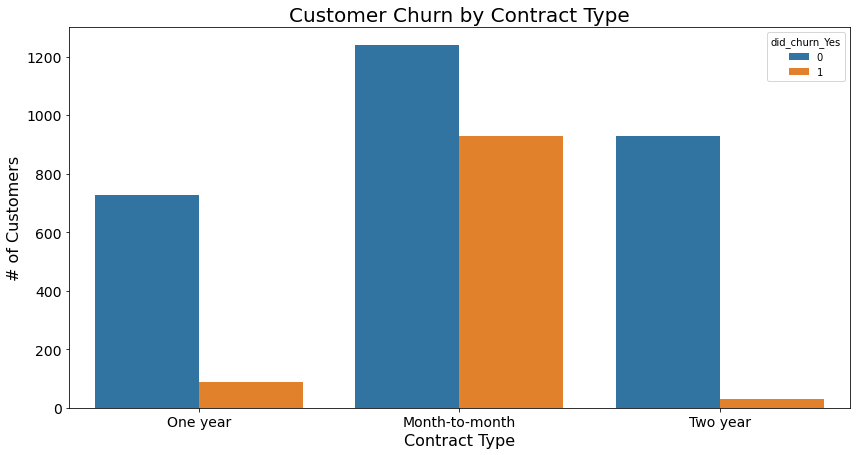

In [123]:
plt.figure(figsize=(14,7))
 
# count plot on two categorical variable
sns.countplot(x ='contract_type', hue = "did_churn_Yes", data = train)

plt.title('Customer Churn by Contract Type', fontsize = 20)
plt.xlabel('Contract Type', fontsize = 16)
plt.ylabel('# of Customers', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Show the plot
plt.show()

### 4. DATA CONTEXT: REVENUE 

In [125]:
## Code to obtain revenue numbers
total_monthly_revenue_overall = acquire_df.monthly_charges.sum()
total_monthly_revenue_train = train.monthly_charges.sum()
churn_monthly_revenue_lost_overall= acquire_df[acquire_df.churn == 'Yes'].monthly_charges.sum()
churn_monthly_revenue_lost_train = train[train.did_churn_Yes == 1].monthly_charges.sum()
monthly_50_percent_churn_overall = total_monthly_revenue_overall - churn_monthly_revenue_lost_overall
monthly_50_percent_churn_sample = total_monthly_revenue_train - churn_monthly_revenue_lost_train
revenue_after_churn_overall = total_monthly_revenue_overall - (churn_monthly_revenue_lost_overall * .5)
revenue_after_churn_sample = total_monthly_revenue_train - (churn_monthly_revenue_lost_train * .5)
print(f' Overall Monthly Revenue if 50% Recovered = $ {monthly_50_percent_churn_overall:,.0f}')
print(f' Sample Monthly Revenue if 50% Recovered = $ {monthly_50_percent_churn_sample:,.0f}')
print(f' Overall Monthly Revenue Lost to Churn = $ {churn_monthly_revenue_lost_overall:,.0f}')
print(f' Sample Monthly Revenue Lost to Churn = $ {churn_monthly_revenue_lost_train:,.0f}')
print(f' Overall Monthly Revenue if 50% Recovered = $ {revenue_after_churn_overall :,.0f}')
print(f' Sample Monthly Revenue if 50% Recovered = $ {revenue_after_churn_sample :,.0f}')

 Overall Monthly Revenue if 50% Recovered = $ 316,986
 Sample Monthly Revenue if 50% Recovered = $ 176,982
 Overall Monthly Revenue Lost to Churn = $ 139,131
 Sample Monthly Revenue Lost to Churn = $ 78,156
 Overall Monthly Revenue if 50% Recovered = $ 386,551
 Sample Monthly Revenue if 50% Recovered = $ 216,060


---

### Revenue After Churn

### $ 316,985

---

### Revenue LOST Through Churn

### $ 139,130

---

### What Would the Monthly Revenue be if Telco Recovered 50% of the Churned Customers?

### $ 386,551

---

### Total Monthly Revenue

----

### Visualization

<BarContainer object of 3 artists>

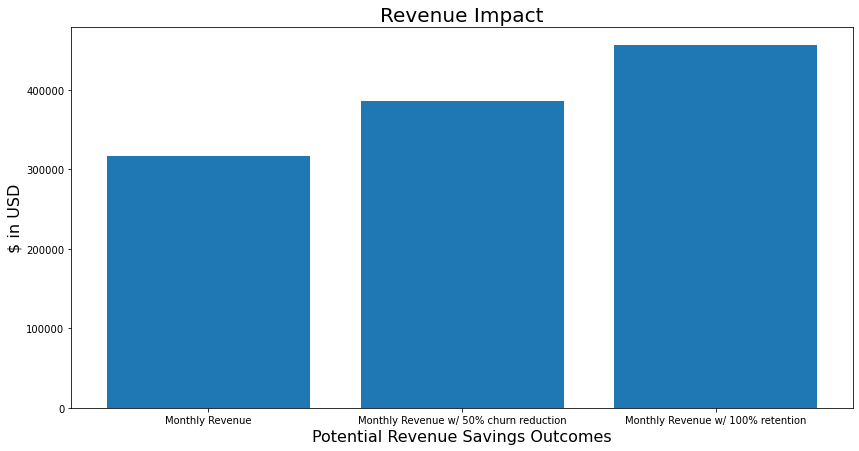

In [109]:
monthly_revenue = total_monthly_revenue_overall

monthly_minus_churn = total_monthly_revenue_overall - churn_monthly_revenue_lost_overall

monthly_50_percent_churn = total_monthly_revenue_overall - (churn_monthly_revenue_lost_overall * 0.5)

x = [
     "Monthly Revenue",
     "Monthly Revenue w/ 50% churn reduction",
     "Monthly Revenue w/ 100% retention",
    ]

y = [monthly_minus_churn, monthly_50_percent_churn, monthly_revenue]
plt.figure(figsize=(14,7))
plt.title('Revenue Impact', fontsize = 20)
plt.xlabel('Potential Revenue Savings Outcomes', fontsize = 16)
plt.ylabel('$ in USD', fontsize = 16)

plt.bar(x, y)

---

## ULTIMATE TAKE-AWAYS
#### - Fiber optic internet subscribers -> more likely to churn
#### - Customers with higher than average monthly bills -> more likely to churn
#### - Month-to-month customers -> more likely to churn
#### - $ 140,000 in monthly revenue is lost to churn

_________

## DATA MODELING

## Summary 
Because churn is a yes or no (boolean) value, classification machine learning algorithms were used to fit to the training data and the models were evaluated on validate data. The best model was selected using accuracy, because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong. In other words, the model was optimized for identifying true positives (actual churn when predicted), and true negative (no churn when predicted).   

### Baseline
I will set a baseline prediction by predicting all customers will churn (churn == 0). I will evaluate the accuracy of that.

In [21]:
# Set X and y variables for model testing. 
X_train, y_train = train.drop(columns=['contract_type', 'internet_service_type', 'payment_type','did_churn_Yes']), train['did_churn_Yes']
X_validate, y_validate = validate.drop(columns=['contract_type', 'internet_service_type', 'payment_type','did_churn_Yes']), validate['did_churn_Yes']
X_test, y_test = test.drop(columns=['contract_type', 'internet_service_type', 'payment_type','did_churn_Yes']), test['did_churn_Yes']

In [32]:
train.did_churn_Yes.value_counts()
baseline = y_train.mode()
matches_baseline_prediction = (y_train == 0)
baseline_accuracy = matches_baseline_prediction.mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.43%


#### The 3 models built were 
- Decision Tree
- Random Forest
- Logistic Regression

The models were run with many trials, adjusting parameters and algorithms to find the best performing model.  

- None of these model appeared to be overfit.

- The Random Forest Model that performed best had 10 samples_per_leaf and max_depth of 10, with train accuracy of 82.9% and validate accuracy of 80.0.% performing 6.47% better than baseline with validate. 

- it was then applied to the un-seen test data.

In [34]:
# Evaluate Random Forest models on train & validate set 
# by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    forest = forest.fit(X_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.734315,0.734005,0.000311
1,2,2,0.765304,0.751185,0.014119
2,3,3,0.787148,0.770142,0.017005
3,4,4,0.801880,0.781991,0.019889
4,5,5,0.808230,0.791469,0.016760
5,6,6,0.811786,0.786730,0.025056
6,7,7,0.815342,0.796209,0.019133
7,8,8,0.821184,0.791469,0.029714
8,9,9,0.828550,0.796209,0.032341
9,10,10,0.830328,0.796801,0.033527


This model performed the best on the validate sample, therefore, it was moved forward to be applied to the test sample.

In [36]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
forest = RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train

# use the model and evaluate performance on validate
test_accuracy = forest.score(X_test, y_test)

print(f'test_accuracy: {test_accuracy: 2%}')

test_accuracy:  80.241649%


This model is expected to perform with 80% accuracy in the future on data it has not seen, given no major changes in the data source.

## Conclusion

### Summary

The goal of this report was to identify drivers of churn for Telco and to present reccomendations based on the findings.  
Through the process of data acquisition, preparation, exploration, and statistical testing, it was determined customers more at-risk of churn are customers with either: 

- fiber optic internet 
- month-to-month contracts  
- and higher monthly bills 

It was also determined Telco has the potential to recover nearly $140K in monthly revenue if this attrition is addressed. 

 By using machine learning modeling, predictions to prevent churn were made with 80% accuracy within the best performing model. Using the modeling, a list of customers predicted to churn was created, to be useful in developing mechanisms within marketing and customer retention teams to prevent churn in high-risk customer groups. 

### Recommendations

It is recommended each area of churn is addressed in order to maximize retention and stabilize revenue. The following recommendations are based upon each risk factor identified.

---

#### 1. Fiber Optic Internet: 
   - Send out electronic surveys to fiber optic internet users, requesting feedback on internet service and quality satisfaction. 
    - Give a $10 statement credit towards following month's bill for completion of survey.  
    - Collect data on survey results to move towards next steps of identifying the reason for high churn rate for fiber optic customers.

---

#### 2. Month-to-Month Contracts:
    - Apply $15 statement credit to be applied to the FOLLOWING month's bill for month-to-month contracts.
    - Provide %15 discount on 1-year contracts for month-to-month customers who convert within the next 2 months.

---

#### 3. Higher Monthly Bills:
    - Apply $10 statement credit to be applied to the FOLLOWING month's bill for contract with monthly charges over the overall average.

### NEXT STEPS
If given more time, further exploration would be beneficial in the following areas:

1. Fiber-Optic_Internet: 
    - Identifying factors contributing to fiber-optic churn, such as quality, price, or add-on feature satisfaction.
    
2. Month-to-Month Contracts:
    - Identify revenue impact of promotions to retain customers to identify optimal price point.
    
3. Higher Monthly Bills: 
    - Identify revenue impact of promotions to retain customers to identify optimal price point.
    
4. Further quantify how much money is being lost to each of the groups identified as high-risk for churning to assist in targeting and prioritize marketing approaches. 